In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier

In [14]:
train_df = pd.read_csv(Path('Resources/2019loans.csv'))
test_df = pd.read_csv(Path('Resources/2020Q1loans.csv'))




,Unnamed: 0,index,loan_amnt,int_rate,installment,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,...,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag
0,57107,57107,13375.0,0.1797,483.34,MORTGAGE,223000.0,Not Verified,low_risk,n,...,100.0,50.0,0.0,0.0,577150.0,122018.0,32000.0,170200.0,N,N
1,141451,141451,21000.0,0.1308,478.68,MORTGAGE,123000.0,Source Verified,low_risk,n,...,85.0,33.3,0.0,0.0,132750.0,27896.0,15900.0,35398.0,N,N
2,321143,321143,20000.0,0.1240,448.95,MORTGAGE,197000.0,Source Verified,low_risk,n,...,85.7,33.3,0.0,0.0,628160.0,114043.0,22600.0,90340.0,N,N
3,11778,11778,3000.0,0.1240,100.22,RENT,45000.0,Not Verified,low_risk,n,...,100.0,16.7,1.0,0.0,42006.0,20761.0,19900.0,15406.0,N,N
4,169382,169382,30000.0,0.1612,1056.49,MORTGAGE,133000.0,Source Verified,low_risk,n,...,100.0,66.7,0.0,0.0,283248.0,109056.0,79500.0,58778.0,N,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12175,354912,354912,19975.0,0.2565,801.09,RENT,28000.0,Not Verified,high_risk,n,...,100.0,16.7,0.0,0.0,50055.0,28192.0,18700.0,19055.0,N,N
12176,354944,354944,15000.0,0.1774,540.34,RENT,50000.0,Verified,high_risk,n,...,90.5,11.1,0.0,0.0,70324.0,57025.0,13300.0,54824.0,N,N
12177,354973,354973,3600.0,0.1862,131.28,RENT,60000.0,Not Verified,high_risk,n,...,100.0,0.0,0.0,0.0,83765.0,55156.0,14800.0,53065.0,N,N
12178,355002,355002,15000.0,0.0881,475.68,MORTGAGE,62000.0,Source Verified,high_risk,n,...,100.0,0.0,0.0,0.0,189930.0,23748.0,7000.0,32930.0,N,N


In [18]:
X_train = pd.get_dummies(train_df.drop(columns=['loan_status']))
X_train
y_train = train_df['loan_status']

X_test = pd.get_dummies(test_df.drop(columns=['loan_status']))
y_test = test_df['loan_status']




for i in X_train.columns:
    if i not in X_test.columns:
        X_test[i]=0





In [21]:
X_test

,Unnamed: 0,index,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,verification_status_Verified,pymnt_plan_n,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,67991,67991,40000.0,0.0819,814.70,140000.0,19.75,0.0,1.0,18.0,...,0,1,0,1,1,0,1,0,1,0
1,25429,25429,6000.0,0.1524,208.70,55000.0,11.52,2.0,0.0,8.0,...,0,1,0,1,1,0,1,0,1,0
2,38496,38496,3600.0,0.1695,128.27,42000.0,6.74,0.0,0.0,6.0,...,0,1,0,1,1,0,1,0,1,0
3,19667,19667,20000.0,0.1524,478.33,100000.0,12.13,0.0,2.0,7.0,...,0,1,0,1,1,0,1,0,1,0
4,37505,37505,3600.0,0.1240,120.27,50000.0,16.08,0.0,3.0,6.0,...,0,1,0,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,77282,77282,30000.0,0.1240,673.42,140480.0,15.74,0.0,0.0,20.0,...,0,1,1,0,1,0,1,0,1,0
4698,77291,77291,24000.0,0.0756,747.22,50000.0,26.81,0.0,0.0,9.0,...,0,1,0,1,1,0,1,0,1,0
4699,77292,77292,10000.0,0.2305,387.36,33000.0,38.51,0.0,2.0,7.0,...,1,1,1,0,1,0,1,0,1,0
4700,77297,77297,8000.0,0.1862,205.86,38000.0,16.36,0.0,1.0,8.0,...,0,1,0,1,1,0,1,0,1,0


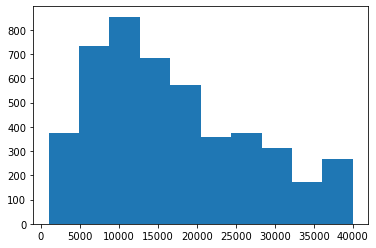

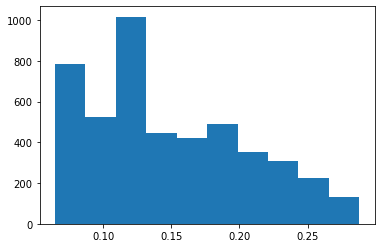

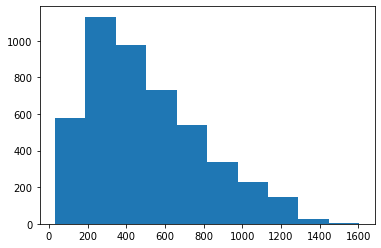

In [29]:
plt.hist(X_test['loan_amnt'])
plt.show()
plt.hist(X_test['int_rate'])
plt.show()
plt.hist(X_test['installment'])
plt.show()

## After looking at three histograms I am perdicting the logistic regression to be the most accurate. Varibles are not perfect but are some what normally distributed

In [4]:
# Convert categorical data to numeric and separate target feature for training data
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.5253083794130158

In [31]:
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

0.6133560187154402

## Perdiction was wrong RandomForestClassifier showed a higher perdiction power. I perdict logistical regression will be better when we transform the data. 



In [6]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_transformed = scaler.transform(X_train)
X_test_transformed = scaler.transform(X_test)

classifier = LogisticRegression()
classifier.fit(X_train_transformed, y_train)
classifier.score(X_test_transformed, y_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7207571246278179

In [7]:
classifier = RandomForestClassifier()
classifier.fit(X_train_transformed, y_train)
classifier.score(X_test_transformed, y_test)

0.5716716290940026

## as expected logitsitc was better when we transformed the data. 

In [8]:
# add missing dummy variables to testing set



In [9]:
# Train the Logistic Regression model on the unscaled data and print the model score

In [10]:
# Train a Random Forest Classifier model and print the model score

In [11]:
# Scale the data

In [12]:
# Train the Logistic Regression model on the scaled data and print the model score

In [13]:
# Train a Random Forest Classifier model on the scaled data and print the model score